# Introduction

Graph colouring is the problem of assigning colours to vertices of a graph such that no two adjacent vertices share the same colour. This problem appears in many applications such as scheduling, frequency assignment, and resource allocation.

Determining the chromatic number (minimum number of colours needed) of a graph is NP-hard in general, so practical algorithms often rely on heuristics (approximate methods). One of the simplest and most commonly used heuristics is greedy colouring.



---


### Idea behind **Greedy Colouring**
The greedy colouring algorithm processes vertices in a fixed order
v1, v2, ..., vn and assigns to each vertex the smallest available colour that is not used by its already coloured neighbours.


---


### Key properties:

* Always produces a proper colouring

* Very fast and easy to implement

* The number of colours depends on the chosen vertex order

* Not necessarily optimal


---


### Justification of the Algorithm
When colouring a vertex v, only its already coloured neighbours restrict the choice of colour.

Since a vertex has at most deg(v) neighbours, at most that many colours are forbidden. Therefore, a new colour is always available.


#### The algorithm is greedy because:
> it makes a locally optimal choice (smallest possible colour)

> it never revises earlier decisions

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

In [30]:
# Helper functions
def print_dict(graph):
    for v in graph:
        print(v, ":", *graph[v])

def plot_coloring(graph, coloring):

    G = nx.Graph()

    # Add nodes to control order
    for v in graph:
        G.add_node(v)

    # Add edges
    for u in graph:
        for v in graph[u]:
            if u < v:  # avoid double edges
                G.add_edge(u, v)

    # Fix node order so colors match nodes
    nodes = list(G.nodes())
    node_colors = [coloring[v] for v in nodes]

    pos = nx.spring_layout(G, seed=42)

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        cmap=plt.cm.tab10,
        node_size=700,
        font_weight="bold"
    )

    plt.show()

def degree_ordering(graph):
    """
    Largest-degree-first ordering (Welsh–Powell heuristic).
    Vertices are ordered by decreasing degree.
    """
    return sorted(graph.keys(), key=lambda v: len(graph[v]), reverse=True)

def max_degree(graph):
    """
    Returns the maximum degree Δ(G) of the graph.
    """
    return max(len(neighbors) for neighbors in graph.values())

def chromatic_upper_bound(graph):
    """
    Upper bound on the chromatic number: Δ(G) + 1
    """
    return max_degree(graph) + 1

# Degeneracy_ordering
def degeneracy_ordering(graph):
    """
    Computes the smallest-last (degeneracy) ordering.
    Returns:
        order – smallest-last ordering
        k     – degeneracy of the graph
    """
    G = {v: set(neigh) for v, neigh in graph.items()}
    order = []
    k = 0

    while G:
        v = min(G, key=lambda x: len(G[x]))
        deg_v = len(G[v])
        k = max(k, deg_v)

        order.append(v)

        for u in G[v]:
            if u in G:          # <-- CRITICAL LINE
                G[u].discard(v)

        del G[v]

    return order, k


# Greedy colouring algorithm
def greedy_coloring(graph, order=None):
    """
    Greedy vertex colouring.
    Returns a dictionary: vertex -> colour (positive integers).
    """
    if order is None:
        order = list(graph.keys())

    color = {}

    for v in order:
        # colours used by neighbours already coloured
        used = set(color[u] for u in graph[v] if u in color)

        # smallest positive integer not in used
        c = 1
        while c in used:
            c += 1

        color[v] = c

    return color

In [31]:
graph_dict = {
    1: [2, 3],
    2: [1, 3],
    3: [1, 2, 4],
    4: [3]
}

print_dict(graph_dict)

colors = greedy_coloring(graph_dict, order=[1, 2, 3, 4])
print(colors)

1 : 2 3
2 : 1 3
3 : 1 2 4
4 : 3
{1: 1, 2: 2, 3: 3, 4: 1}


We process vertices one by one. When colouring a vertex, only its already coloured neighbours matter. Choosing the smallest available colour guarantees the colouring remains proper. The number of colours used depends heavily on the chosen order of vertices.

Step-by-step explanation

Vertex 1

No coloured neighbours > we assign colour 1

Vertex 2

Neighbour 1 has colour 1 > we assign smallest free colour 2

Vertex 3

Neighbours 1 and 2 have colours 1 and 2 > we assign smallest free colour → 3

Vertex 4

Neighbour 3 has colour 3 > we assign colour 1

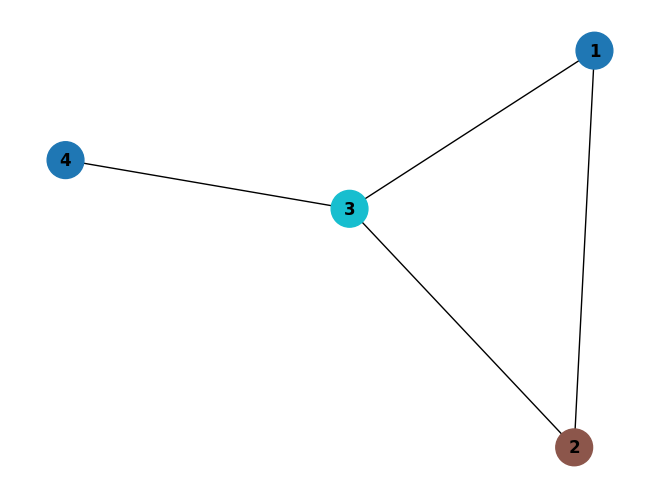

In [32]:
colors = greedy_coloring(graph_dict)
plot_coloring(graph_dict, colors)


> Greedy colouring is fast and simple

> It always produces a proper colouring

> Its quality depends on vertex order

> It is useful as a baseline or approximation method

### Example of quality depending on vertex order

In [33]:
graph_adv = {
    1: [2, 3, 4],
    2: [1, 3, 5],
    3: [1, 2, 6],
    4: [1, 5, 6],
    5: [2, 4, 6],
    6: [3, 4, 5]
}

print_dict(graph_adv)

1 : 2 3 4
2 : 1 3 5
3 : 1 2 6
4 : 1 5 6
5 : 2 4 6
6 : 3 4 5


In [34]:
order_bad = [1, 2, 3, 4, 5, 6]
colors_bad = greedy_coloring(graph_adv, order_bad)
print(colors_bad)
order_better = [1, 3, 5, 2, 4, 6]
colors_better = greedy_coloring(graph_adv, order_better)
print(colors_better)

{1: 1, 2: 2, 3: 3, 4: 2, 5: 1, 6: 4}
{1: 1, 3: 2, 5: 1, 2: 3, 4: 2, 6: 3}


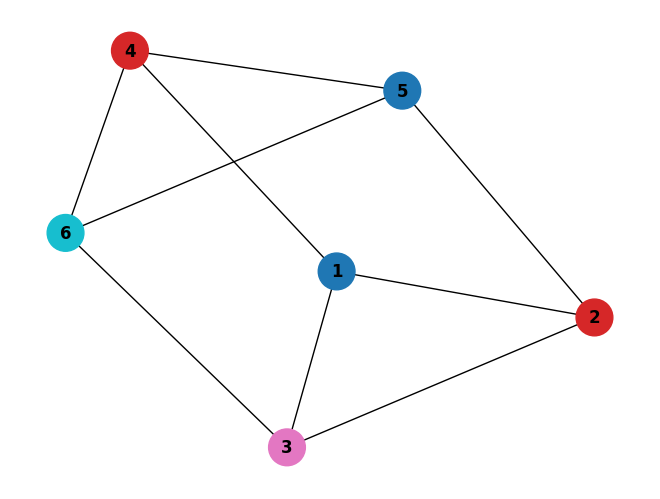

In [35]:
plot_coloring(graph_adv, colors_bad)

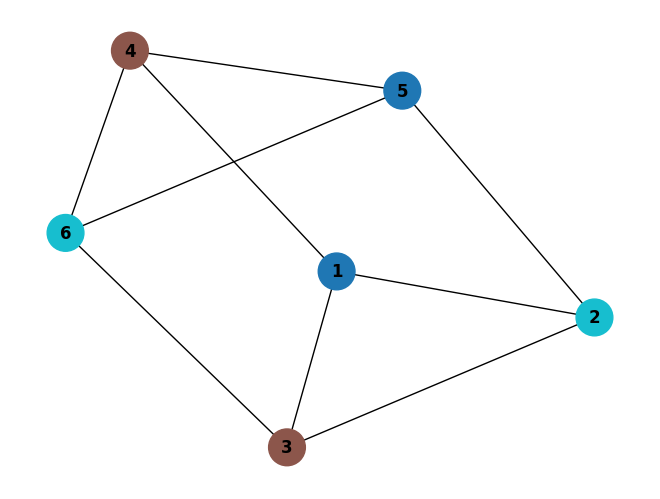

In [36]:
plot_coloring(graph_adv, colors_better)

## Vertex ordering heuristics and colour bounds

The greedy colouring algorithm does not guarantee an optimal colouring. Different vertex orders may lead to different colourings and colour counts. This is why vertex ordering heuristics are often used in practice.

Since computing the chromatic number is NP-hard, greedy colouring is used to obtain upper bounds on the chromatic number rather than exact values.

Two commonly used ordering heuristics are:

> Largest-degree-first ordering

> Smallest-last ordering

In [37]:
graph_new = {
    1: [2, 3, 4, 5],
    2: [1, 8, 9],
    3: [1, 10],
    4: [1],
    5: [1, 6, 11],
    6: [5, 7],
    7: [6, 10, 11],
    8: [2],
    9: [2, 7],
    10: [3],
    11: [5, 7]
}

## Degree ordering: Largest degree first

Idea
> Vertices with many neighbours are harder to colour, so we colour them earlier, when more colours are still available.

---

#### This heuristic is often called largest degree ordering or Welsh–Powell algorithm

Compute the degree of every vertex.

Sort vertices in non-increasing order of degree.

Apply greedy colouring using this order.

---

### Properties

Often improves results

High-degree vertices restrict many others, so assigning them colours first reduces conflicts later



In [38]:
order_deg_first = degree_ordering(graph_new)
colors_deg_first = greedy_coloring(graph_new, order_deg_first)

print("Largest-degree-first order:", order_deg_first)
print("Colours used (degree ordering):", max(colors_deg_first.values()))

Largest-degree-first order: [1, 2, 5, 7, 3, 6, 9, 11, 4, 8, 10]
Colours used (degree ordering): 3


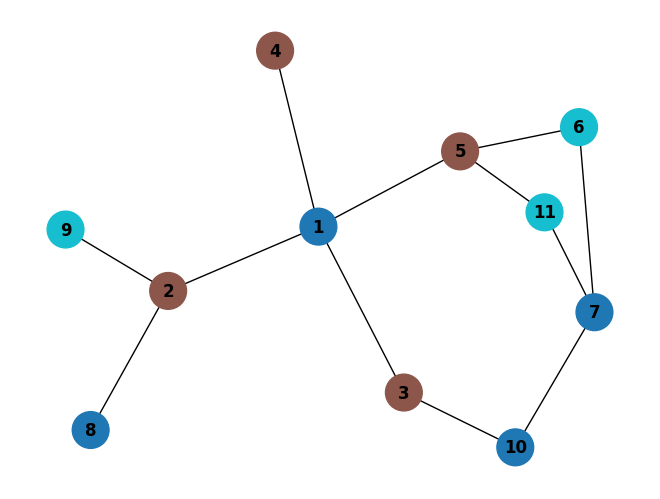

In [39]:
plot_coloring(graph_new, colors_deg_first)

## Degeneracy ordering: Smallest degree last

Idea
> We first remove vertices in a smart way and then colour in reverse order.

---

#### This method is known as smallest-last ordering or degeneracy ordering

Repeatedly remove a vertex of minimum degree from the graph.

Record the removal order.

Reverse this order.

Apply greedy colouring using the reversed order.

---

####  Important result
> Greedy colouring with smallest-last ordering uses at most k+1 colours where k is the maximum of the minimum degrees encountered when repeatedly removing the smallest-degree vertex.

The colouring number of the graph is defined as
col(G)=k+1

For comparison, greedy colouring always uses at most Δ(G)+1 colours

> The bound Δ(G)+1 is a general upper bound, while col(G)=k+1 is often tighter.

In [40]:
order_deg, k = degeneracy_ordering(graph_new)

print("Smallest-last removal order:", order_deg)
order_deg_reversed = list(reversed(order_deg))
print("Greedy colouring order:", order_deg_reversed)

colors_deg = greedy_coloring(graph_new, order_deg_reversed)
print("Colouring (vertex deg):", colors_deg)
print("Number of colours used:", max(colors_deg.values()))

Smallest-last removal order: [4, 8, 10, 3, 1, 2, 9, 5, 6, 11, 7]
Greedy colouring order: [7, 11, 6, 5, 9, 2, 1, 3, 10, 8, 4]
Colouring (vertex deg): {7: 1, 11: 2, 6: 2, 5: 1, 9: 2, 2: 1, 1: 2, 3: 1, 10: 2, 8: 2, 4: 1}
Number of colours used: 2


In [41]:
print("Degeneracy k:", k)
print("Δ(G) + 1 upper bound:", chromatic_upper_bound(graph_new))
print("Colouring number col(G) = k + 1=", k + 1)

Degeneracy k: 2
Δ(G) + 1 upper bound: 5
Colouring number col(G) = k + 1= 3


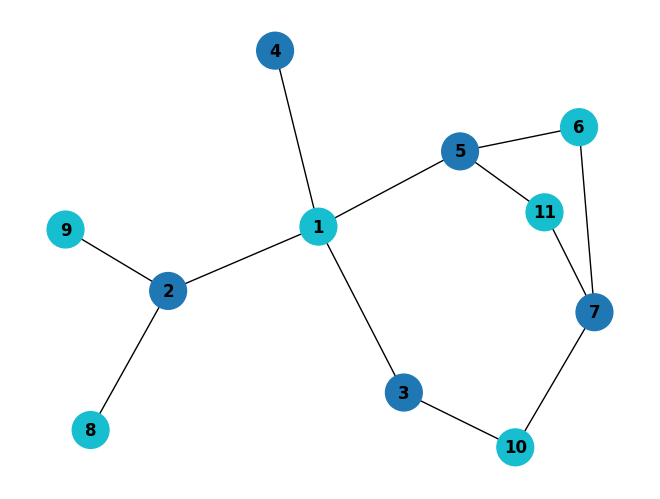

In [42]:
plot_coloring(graph_new, colors_deg)

## Final Thoughts

Greedy colouring is a simple and efficient heuristic for graph colouring, but its performance depends strongly on the chosen vertex order.

Largest-degree-first colours vertices with many neighbours early, while degeneracy ordering takes advantage of parts of the graph where vertices have only a few neighbours.

As demonstrated by the examples, neither heuristic is universally superior. Some graphs benefit more from degree-based ordering, while others are better handled by degeneracy ordering.

Therefore, greedy colouring is best understood as a flexible framework whose effectiveness depends on appropriate vertex ordering heuristics rather than a single optimal strategy.